In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

C:\Users\zonn\AppData\Local\Temp\ipykernel_12256\406165099.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
tunnel = pd.read_csv("data/tunnel.csv", parse_dates=['Day'])
tunnel = tunnel.set_index("Day").to_period()
tunnel.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 747 entries, 2003-11-01 to 2005-11-16
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NumVehicles  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [6]:
moving_average = tunnel.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()
moving_average.head()

,NumVehicles
Day,
2003-11-01,99127.426230
2003-11-02,99094.489130
2003-11-03,99112.481081
2003-11-04,99146.639785
2003-11-05,99196.122995


<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

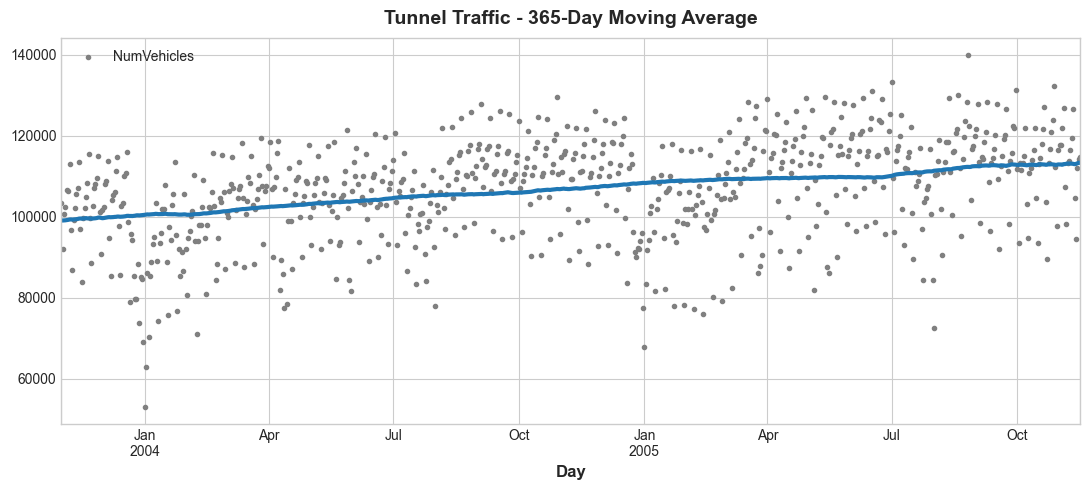

In [7]:
ax = tunnel.plot(style='.', color='0.5')
moving_average.plot(
ax=ax, linewidth=3, title='Tunnel Traffic - 365-Day Moving Average', legend=False,
)

Using the DeterministicProcess function. The order argument refers to polynomial order: 1 linear, 2 quadratic, 3 cubic...

In [8]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index, # dates
    constant=True, # dummy feature for the bias
    order=1, # the time dummy
    drop=True,
)

X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [9]:
from sklearn.linear_model import LinearRegression
y = tunnel['NumVehicles']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [10]:
y_pred_ = model.predict(X)
y_pred = pd.Series(model.predict(X), index=X.index)

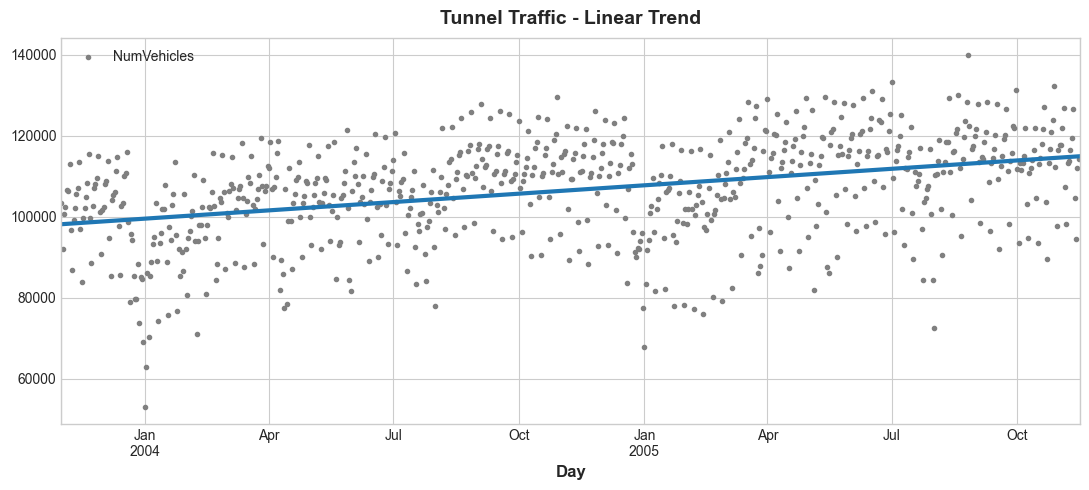

In [11]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [12]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

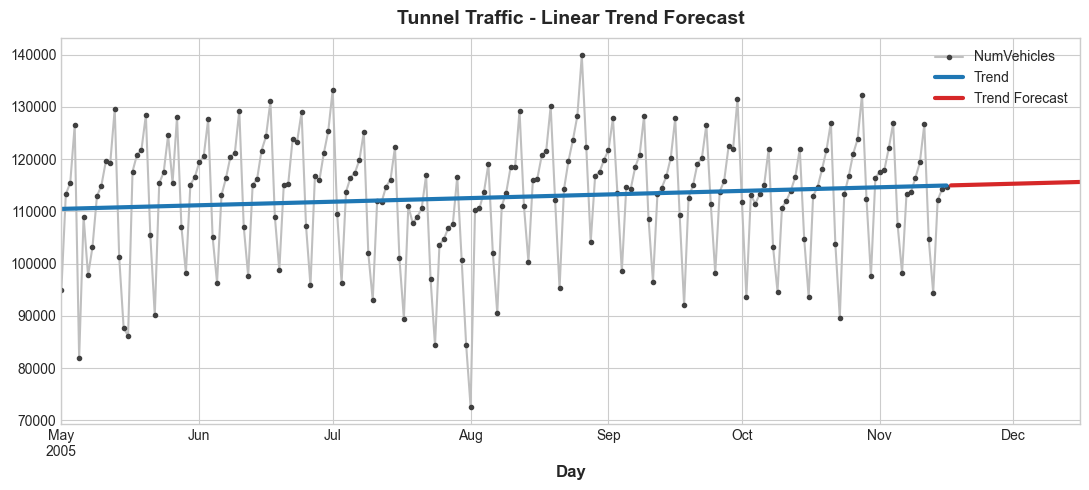

In [13]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()